# Partial Solution: Autoregressive Model

In [1]:
# This code imports the data you generated before for replicating.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

diff_T = pd.read_csv('diff_T.csv')
diff_T = diff_T.set_index('timestamp')

In [2]:
split = int(len(diff_T.values)*0.95)
diff_train_T = diff_T.iloc[:split]
diff_test_T = diff_T.iloc[split:]

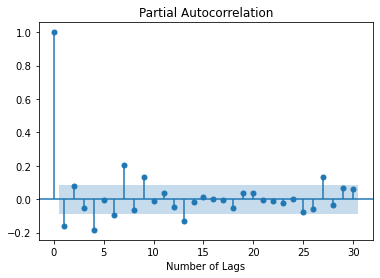

In [3]:
sm.graphics.tsa.plot_pacf(diff_T,lags=30)
plt.xlabel('Number of Lags')
plt.show()

In [4]:
from statsmodels.tsa.ar_model import AutoReg

In [5]:
ar_T = AutoReg(diff_train_T, lags=7)
ar_fitted_T = ar_T.fit()

In [6]:
ar_predictions_T = ar_fitted_T.predict(start=len(diff_train_T), 
                                       end=len(diff_train_T)+len(diff_test_T)-1,dynamic=False)

In [7]:
ar_predictions_T = pd.DataFrame(ar_predictions_T)
ar_predictions_T.index = diff_test_T.index

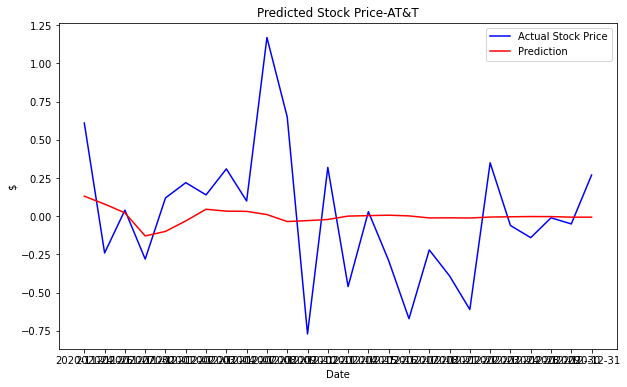

In [8]:
plt.figure(figsize=(10,6))
plt.plot(diff_test_T, label='Actual Stock Price', c='b')
plt.plot(ar_predictions_T, c='r', label='Prediction')
plt.title('Predicted Stock Price-AT&T')
plt.xlabel('Date')
plt.ylabel('$')
plt.legend()
plt.show()

In [9]:
from sklearn.metrics import mean_squared_error

def rmse(y,yhat):
    return np.sqrt(mean_squared_error(y,yhat))

In [10]:
print('RMSE of AT&T for AR model {:.4f}'\
      .format(rmse(diff_test_T,ar_predictions_T)))

RMSE of AT&T for AR model 0.4188
